# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
#load the libraries
import os
import glob
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
%matplotlib inline

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from icecream import ic

In [4]:
!pip install pyLDAvis

In [4]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [5]:
os.getcwd()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'C:\\Users\\peddi\\Unsupervised Learning projects'

In [6]:
os.chdir(r'D:\Data science\Alma better\Topic Modeling on BBC News Articles\bbc\business')

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Read text File
path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\business'
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        print(f.read())
          
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
  
        # call read text file function
        read_text_file(file_path) 

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \{
<>:11: DeprecationWarning: invalid escape sequence \{
<ipython-input-7-d134b6257df3>:11: DeprecationWarning: invalid escape sequence \{
  file_path = f"{path}\{file}"


Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AO

Rover deal 'may cost 2,000 jobs'

Some 2,000 jobs at MG Rover's Midlands plant may be cut if investment in the firm by a Chinese car maker goes ahead, the Financial Times has reported.

Shanghai Automotive Industry Corp plans to shift production of the Rover 25 to China and export it to the UK, sources close to the negotiations tell the FT. But Rover told BBC News that reports of job cuts were "speculation". A tie-up, seen as Rover's last chance to save its Longbridge plant, has been pushed by UK Chancellor Gordon Brown. Rover confirmed the tie-up would take place "not very far away from this time".

Rover bosses have said they are "confident" the Â£1bn ($1.9bn) investment deal would be signed in March or early April.

Transport & General Worker's Union general secretary Tony Woodley repeated his view on Friday that all mergers led to some job cuts. He said investment in new models was needed to ensure the future of the Birmingham plant. "This is a very crucial and delicate time and ou

GSK aims to stop Aids profiteers

One of the world's largest manufacturers of HIV/Aids drugs has launched an initiative to combat the smuggling of cheaper pills - supplied to poorer African countries - back into Europe for resale at far higher price.

The company, GlaxoSmithKline, is to alter the packaging and change the colour of the pills, currently provided to developing nations under a humanitarian agreement. It is estimated that drugs companies are losing hundreds of millions of dollars each year as a result of the diversion of their products in this way. This is a very sensitive area for the big drugs companies. They want to maintain their profits, but have been put under tremendous pressure to provide cheap anti-Aids drugs to the world's poorest nations.

The result is that drugs supplied to Africa are now more than thirty times cheaper than those sold in Europe; bringing these medicines within the reach of millions of HIV-positive Africans through their government's health care

Disney settles disclosure charges

Walt Disney has settled charges from US federal regulators that it failed to disclose how family members of directors were employed by the company.

The media giant was not fined by the Securities and Exchange Commission, but has agreed to refrain from any future violations of securities law. Disney failed to tell investors that between 1999 and 2001 it employed three adult children of three then directors. The firm has neither admitted nor denied wrongdoing in the settlement.

The three Disney directors in question in the central matter of the SEC's investigation - Reveta Bowers, Stanley Gold and Raymond Watson - have all since left the company, with Ms Bowers and Mr Watson both retiring, and Mr Gold quitting in 2003. Their children were paid between $60,000 (Â£30,800) and $150,000 a year, with shareholders not being informed. The SEC also found that Disney did not disclose that a 50% Disney-owned subsidiary company - Lifetime - employed the wife of 

### Data Extraction from many text files

In [8]:
# Business news articles
busi_path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\business'

all_busi_files = glob.glob(busi_path + "/*.txt")

busi_data = []

for filename in all_busi_files:

    read1 = pd.read_csv(filename, delimiter='\t',header=None,prefix='News articles',skiprows=lambda x: x in [0, 1])
    busi_data.append(read1)
    

df1 = pd.concat(busi_data, axis=0,ignore_index=True)
df1

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,Quarterly profits at US media giant TimeWarner...
1,"The firm, which is now one of the biggest inve..."
2,Time Warner said on Friday that it now owns 8%...
3,Time Warner's fourth quarter profits were slig...
4,TimeWarner is to restate its accounts as part ...
...,...
2172,"Already, about 28% of the bosses polled for th..."
2173,"According to Frank Brown, global advisory lead..."
2174,"- For the survey, PricewaterhouseCoopers inte..."
2175,Luxury goods group LVMH has sold its loss-maki...


In [9]:
busi_data[509]

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,Luxury goods group LVMH has sold its loss-maki...
1,The Paris-based firm has been shedding non-cor...


In [10]:
li_busi=[]
for i in range(0,2177):
    li_busi.append("Business")

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
len(li_busi)

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2177

In [12]:
df1['Topic']=li_busi

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df1.tail()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
2172,"Already, about 28% of the bosses polled for th...",Business
2173,"According to Frank Brown, global advisory lead...",Business
2174,"- For the survey, PricewaterhouseCoopers inte...",Business
2175,Luxury goods group LVMH has sold its loss-maki...,Business
2176,The Paris-based firm has been shedding non-cor...,Business


In [14]:
# Entertainment news articles
et_path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\entertainment'

all_et_files = glob.glob(et_path + "/*.txt")

et_data = []

for filename2 in all_et_files:

    read2 = pd.read_csv(filename2, delimiter='\t',header=None,prefix='News articles',skiprows=lambda x: x in [0, 1])
    et_data.append(read2)
    

df2 = pd.concat(et_data, axis=0,ignore_index=True)
df2

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,A Christmas tree that can receive text message...
1,The spruce has an antenna which can receive Bl...
2,The plain green Norway spruce is displayed in ...
3,French musician Jean-Michel Jarre is to perfor...
4,Denmark is holding a three-day celebration of ...
...,...
1715,The Oscar winner said on a visit to Sydney the...
1716,The film-maker recently sued film company New ...
1717,The creator of Buffy the Vampire Slayer is to ...
1718,Joss Whedon described the DC Comics character ...


In [15]:
et_data[0]

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,A Christmas tree that can receive text message...
1,The spruce has an antenna which can receive Bl...
2,The plain green Norway spruce is displayed in ...


In [16]:
li_et=[]
for i in range(0,1720):
    li_et.append("Entertainment")

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
len(li_et)

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1720

In [18]:
df2['Topic']=li_et

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
df2.tail()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
1715,The Oscar winner said on a visit to Sydney the...,Entertainment
1716,The film-maker recently sued film company New ...,Entertainment
1717,The creator of Buffy the Vampire Slayer is to ...,Entertainment
1718,Joss Whedon described the DC Comics character ...,Entertainment
1719,There's no one better than Joss to adapt the l...,Entertainment


In [20]:
# Political news articles
pol_path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\politics'

pol_files = glob.glob(pol_path + "/*.txt")
pol_data = []

for filename3 in pol_files:

    read3 = pd.read_csv(filename3, delimiter='\t',header=None,prefix='News articles',skiprows=lambda x: x in [0, 1])
    pol_data.append(read3)
    
df3 = pd.concat(pol_data, axis=0,ignore_index=True)
df3

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,Maternity pay for new mothers is to rise by £1...
1,It would mean paid leave would be increased to...
2,"Ms Hewitt said: ""We have already doubled the l..."
3,She said the Conservatives would announce thei...
4,Ms Hewitt also stressed the plans would be pai...
...,...
2257,Unveiling the slogan at the party's spring con...
2258,"Speaking in Harrogate Mr Kennedy said: ""People..."
2259,Only the Liberal Democrats stood against the I...
2260,Mr Kennedy also outlined his party's plan to i...


In [21]:
li_po=[]
for i in range(0,2262):
    li_po.append("Politics")

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df3['Topic']=li_po
df3.tail()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
2257,Unveiling the slogan at the party's spring con...,Politics
2258,"Speaking in Harrogate Mr Kennedy said: ""People...",Politics
2259,Only the Liberal Democrats stood against the I...,Politics
2260,Mr Kennedy also outlined his party's plan to i...,Politics
2261,So why are two million of our pensioners livin...,Politics


In [23]:
# Sports news articles
sp_path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\sport'

sp_files = glob.glob(sp_path + "/*.txt")
sp_data = []

for filename4 in sp_files:

    read4 = pd.read_csv(filename4, delimiter='\t',header=None,prefix='News articles',skiprows=lambda x: x in [0, 1],\
                        encoding='unicode_escape',error_bad_lines=False,quoting=3)
    sp_data.append(read4)
    
df4 = pd.concat(sp_data, axis=0,ignore_index=True)
df4

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,British hurdler Sarah Claxton is confident she...
1,The 25-year-old has already smashed the Britis...
2,"For the first time, Claxton has only been prep..."
3,Sonia O'Sullivan has indicated that she would ...
4,Athletics Ireland have hinted that the 35-year...
...,...
2303,Teenager Sania Mirza completed a superb week a...
2304,"In front of a delirious home crowd, the 18-yea..."
2305,"And a year ago, she became the youngest Indian..."
2306,Andy Roddick will play Cyril Saulnier in the f...


In [24]:
li_sp=[]
for i in range(2308):
    li_sp.append("Sports")

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df4['Topic']=li_sp
df4.tail()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
2303,Teenager Sania Mirza completed a superb week a...,Sports
2304,"In front of a delirious home crowd, the 18-yea...",Sports
2305,"And a year ago, she became the youngest Indian...",Sports
2306,Andy Roddick will play Cyril Saulnier in the f...,Sports
2307,The American top seed and defending champion o...,Sports


In [26]:
# Tech news articles
tech_path='D:\\Data science\\Alma better\\Topic Modeling on BBC News Articles\\bbc\\tech'

tech_files = glob.glob(tech_path + "/*.txt")
tech_data = []

for filename5 in tech_files:

    read5 = pd.read_csv(filename5, delimiter='\t',header=None,prefix='News articles',skiprows=lambda x: x in [0, 1])
    tech_data.append(read5)
    
df5 = pd.concat(tech_data, axis=0,ignore_index=True)
df5

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0
0,"The Kyrgyz Republic, a small, mountainous stat..."
1,This new technology is causing both worries an...
2,The Kyrgyz Republic is seen by many experts as...
3,The actual technology behind the ink is not th...
4,"However, the presence of ultraviolet light (of..."
...,...
2161,I bought the US version of World of Warcraft w...
2162,Having played MMORPG games for some years I ag...
2163,Unless there is undeniable medical proof that ...
2164,These people are pathetic. They need to get of...


In [27]:
li_tech=[]
for i in range(0,2166):
    li_tech.append("Tech")

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df5['Topic']=li_tech
df5.tail()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
2161,I bought the US version of World of Warcraft w...,Tech
2162,Having played MMORPG games for some years I ag...,Tech
2163,Unless there is undeniable medical proof that ...,Tech
2164,These people are pathetic. They need to get of...,Tech
2165,"24hours, when i was a kid at school and i was ...",Tech


### Making one dataframe from all the different topic dataframes 

In [29]:
# Final dataframe with all the data
df=pd.concat([df1,df2,df3,df4,df5],axis=0,ignore_index=True)
df.head()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,News articles0,Topic
0,Quarterly profits at US media giant TimeWarner...,Business
1,"The firm, which is now one of the biggest inve...",Business
2,Time Warner said on Friday that it now owns 8%...,Business
3,Time Warner's fourth quarter profits were slig...,Business
4,TimeWarner is to restate its accounts as part ...,Business


### Data Cleaning and Data analysis

In [30]:
df.shape

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10633, 2)

In [31]:
#verification
df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10633

In [32]:
df.rename(columns={'News articles0':'BBC News articles'},inplace=True)

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df.head()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BBC News articles,Topic
0,Quarterly profits at US media giant TimeWarner...,Business
1,"The firm, which is now one of the biggest inve...",Business
2,Time Warner said on Friday that it now owns 8%...,Business
3,Time Warner's fourth quarter profits were slig...,Business
4,TimeWarner is to restate its accounts as part ...,Business


In [34]:
df.shape

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10633, 2)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10633 entries, 0 to 10632
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BBC News articles  10633 non-null  object
 1   Topic              10633 non-null  object
dtypes: object(2)
memory usage: 166.3+ KB


C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


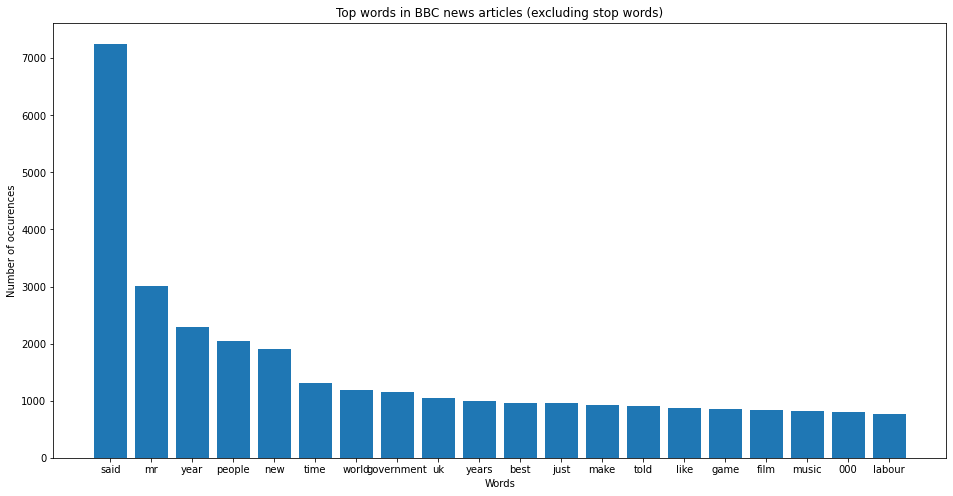

In [37]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['BBC News articles']);

fig, ax = plt.subplots(figsize=(16,8));
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='horizontal');
ax.set_title('Top words in BBC news articles (excluding stop words)');
ax.set_xlabel('Words');
ax.set_ylabel('Number of occurences');
plt.show();

In [38]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
#small_text_sample = df['BBC News articles'].sample(n=10000, random_state=0).values
text_from_data=df['BBC News articles'].values

print('Articles before vectorization: {}'.format(text_from_data[123]))

document_term_matrix = count_vectorizer.fit_transform(text_from_data)

print('Articles after vectorization: \n{}'.format(document_term_matrix[123]))

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Articles before vectorization: Irish shares have risen to a record high, with investors persuaded to buy into the market by low inflation and strong growth forecasts.
Articles after vectorization: 
  (0, 2416)	1
  (0, 2177)	1
  (0, 4341)	1
  (0, 2082)	1
  (0, 2809)	1
  (0, 2744)	1
  (0, 4070)	1
  (0, 3856)	1
  (0, 728)	1
  (0, 3680)	1
  (0, 1895)	1
  (0, 2341)	1
  (0, 2431)	1


In [39]:
text_from_data

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
       'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
       "Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existi

### Data Visualization

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


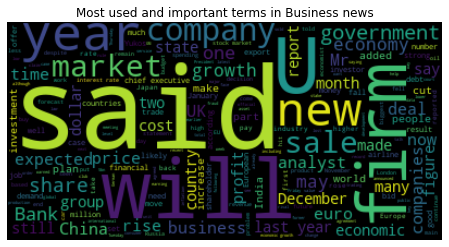

In [55]:
df1_news = " ".join(news for news in df1['News articles0'])

# Create and generate a word cloud image:
wordcloud1 = WordCloud().generate(df1_news)

# Display the generated image:
plt.figure(figsize=(10,4))
plt.title('Most used and important terms in Business news');
plt.imshow(wordcloud1, interpolation='bilinear',cmap='Accent_r');
plt.axis("off");
plt.show();

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


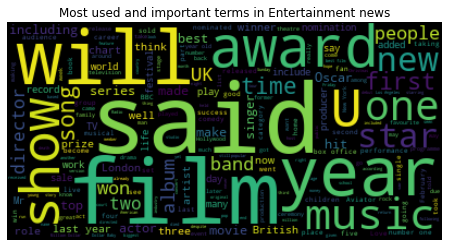

In [57]:
df2_news = " ".join(news for news in df2['News articles0'])

# Create and generate a word cloud image:
wordcloud2 = WordCloud().generate(df2_news)

# Display the generated image:
plt.figure(figsize=(10,4))
plt.title('Most used and important terms in Entertainment news');
plt.imshow(wordcloud2, interpolation='bilinear',cmap='coolwarm');
plt.axis("off");
plt.show();

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


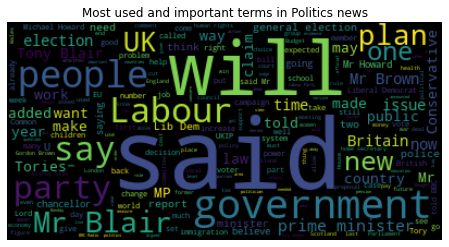

In [59]:
df3_news = " ".join(news for news in df3['News articles0'])

# Create and generate a word cloud image:
wordcloud3 = WordCloud().generate(df3_news)

# Display the generated image:
plt.figure(figsize=(10,4))
plt.title('Most used and important terms in Politics news');
plt.imshow(wordcloud3, interpolation='bilinear',cmap='rainbow_r');
plt.axis("off");
plt.show();

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


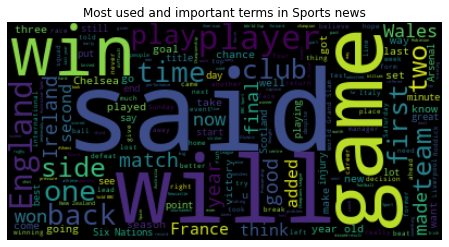

In [66]:
df4_news = " ".join(news for news in df4['News articles0'])

# Create and generate a word cloud image:
wordcloud4 = WordCloud().generate(df4_news)

# Display the generated image:
plt.figure(figsize=(10,4))
plt.title('Most used and important terms in Sports news');
plt.imshow(wordcloud4, interpolation='bilinear');
plt.axis("off");
plt.show();

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


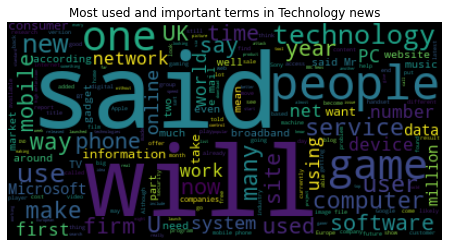

In [64]:
df5_news = " ".join(news for news in df5['News articles0'])

# Create and generate a word cloud image:
wordcloud5 = WordCloud().generate(df5_news)

# Display the generated image:
plt.figure(figsize=(10,4))
plt.title('Most used and important terms in Technology news');
plt.imshow(wordcloud5, interpolation='bilinear',cmap='Spectral_r');
plt.axis("off");
plt.show();

### Modeling: Using LDA for Topic modeling

In [48]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,15))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -660627.765550609
LDA model Perplexity on train data 1964.3679995928892


- A model with higher log-likelihood and lower perplexity is preferred.

### Evaluation of a model
- Best LDA model's params {'n_components': 5}
- Best log likelihood Score for the LDA model -660627.765550609
- LDA model Perplexity on train data 1964.3679995928892

In [49]:
best_lda_model

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5)

In [ ]:
#best_lda_model=LatentDirichletAllocation(n_components=5)
#best_lda_model

In [57]:
lda_model.score

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method BaseSearchCV.score of GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})>

### Data Visualization of results given by the model about different topics and the most important terms in it

In [50]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne',)
lda_panel

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\peddi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  24.026709
4       51.163364 -159.968018       2        1  21.796276
2      -73.144554   21.523815       3        1  20.588951
3      -66.410133 -110.606438       4        1  18.084035
0       54.417324   12.443444       5        1  15.504029, topic_info=            Term         Freq        Total Category  logprob  loglift
2988          mr  2980.000000  2980.000000  Default  30.0000  30.0000
1830        film   826.000000   826.000000  Default  29.0000  29.0000
572         best   947.000000   947.000000  Default  28.0000  28.0000
2580      labour   769.000000   769.000000  Default  27.0000  27.0000
2051  government  1146.000000  1146.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
4576        time   223.884607  1295.443181   Topic5  -5.5470   0.1086
4681          tv   174.856944   478.103907   Topic5  -5.7941   0.8582
538          bbc   183.518668   743.884725   Topic5  -5.7458   0.4645
2720      london   165.697819   450.495103   Topic5  -5.8479   0.8639
2674        life   158.641812   366.179276   Topic5  -5.8915   1.0276

[355 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.149619    000
0         2  0.521129    000
0         3  0.197801    000
0         4  0.011412    000
0         5  0.119188    000
...     ...       ...    ...
4982      3  0.093604  years
4982      4  0.168893  years
4982      5  0.287933  years
4995      2  0.005577  yukos
4995      3  0.992649  yukos

[679 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [66]:
pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='PCoA')

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.058657 -0.154262       1        1  24.026709
4      0.126375 -0.031777       2        1  21.796276
2      0.137480  0.136857       3        1  20.588951
3     -0.174224 -0.059472       4        1  18.084035
0     -0.148288  0.108654       5        1  15.504029, topic_info=            Term         Freq        Total Category  logprob  loglift
2988          mr  2980.000000  2980.000000  Default  30.0000  30.0000
1830        film   826.000000   826.000000  Default  29.0000  29.0000
572         best   947.000000   947.000000  Default  28.0000  28.0000
2580      labour   769.000000   769.000000  Default  27.0000  27.0000
2051  government  1146.000000  1146.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
4576        time   223.884607  1295.443181   Topic5  -5.5470   0.1086
4681          tv   174.856944   478.103907   Topic5  -5.7941   0.8582
538          bbc   183.518668   743.884725   Topic5  -5.7458   0.4645
2720      london   165.697819   450.495103   Topic5  -5.8479   0.8639
2674        life   158.641812   366.179276   Topic5  -5.8915   1.0276

[355 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.149619    000
0         2  0.521129    000
0         3  0.197801    000
0         4  0.011412    000
0         5  0.119188    000
...     ...       ...    ...
4982      3  0.093604  years
4982      4  0.168893  years
4982      5  0.287933  years
4995      2  0.005577  yukos
4995      3  0.992649  yukos

[679 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [ ]:
# 1-Politics,2-Business,3-Technology,4-Sport,5-Entertainment

- From the above visualization of results obtained from LDA Topic modeling and both have different axis then the terms and their distribution of topics were same in the 5 topics from the BBC news articles.
- The difference between two visualization represented are the using two different multi-dimension scaling options present in pyLDAvis. I used two types in it. They are t-sne(T-stochastic neighbour embedding) and PCoA(Principal coordinates analysis). There are many other that can be used in it.
- When I see the terms in topic distribution it has made. It can be observed that when Topic-1 is selected there are more words like said,mr,govt,labour,election,people,party which says they belong to Politics. In Topic-2 the more words are like Year, market, company, growth, uk,oil,business,shares which says they belong to Business news. In the same way, Topic-3 belongs to Technology news, Topic-4 belongs to Sports news and Topic-5 belongs to words from Entertainment news in BBC news articles.

#### Compare the LDA performance

In [51]:
df_cv_results = pd.DataFrame(lda_model.cv_results_)
df_cv_results

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,65.520953,2.951137,1.463104,0.090294,5,{'n_components': 5},-664919.551566,-610955.629627,-672583.231347,-584560.001451,-770120.413762,-660627.765551,63880.542302,1
1,198.685799,344.978615,0.583146,0.027965,6,{'n_components': 6},-675983.762949,-619483.962408,-675742.425305,-594793.687284,-780368.191372,-669274.405864,63961.153251,2
2,26.227941,0.821854,0.571937,0.066951,7,{'n_components': 7},-680016.416756,-626597.714068,-668498.761233,-600738.074355,-786233.131068,-672416.819496,63662.376277,3
3,30.371119,4.490626,0.766334,0.098079,8,{'n_components': 8},-684888.005914,-630491.311564,-682832.112842,-608355.762955,-795504.980570,-680414.434769,64740.191771,4
4,29.683604,3.780602,0.658009,0.101446,9,{'n_components': 9},-694216.917583,-638748.466580,-680606.396736,-611096.337874,-801046.072855,-685142.838325,65071.960090,5
5,29.886184,4.314015,0.656871,0.038839,10,{'n_components': 10},-697573.907028,-645257.716302,-688339.272352,-625290.929232,-805884.812703,-692469.327524,62686.617068,6
6,32.101144,5.718731,0.743796,0.087655,11,{'n_components': 11},-703963.949770,-649391.703202,-686249.275118,-627012.902540,-814175.801094,-696158.726345,64892.908815,7
7,31.538825,5.048484,0.754635,0.086871,12,{'n_components': 12},-705507.348909,-654321.254294,-694106.508199,-632941.587519,-816798.009539,-700734.941692,63698.535253,8
8,34.892239,4.121968,0.817054,0.101635,13,{'n_components': 13},-712721.852248,-660440.745475,-699936.266146,-646684.560058,-827884.988192,-709533.682424,63983.490126,9
9,34.493988,7.110462,0.774873,0.093177,14,{'n_components': 14},-720096.340224,-665030.318054,-692716.816673,-645719.504093,-832852.423945,-711283.080598,65786.602816,10


C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='param_n_components', ylabel='mean_test_score'>

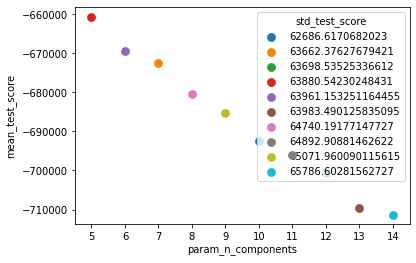

In [52]:
sns.pointplot(x="param_n_components", y="mean_test_score", hue="std_test_score", data=df_cv_results)

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='param_n_components', ylabel='mean_test_score'>

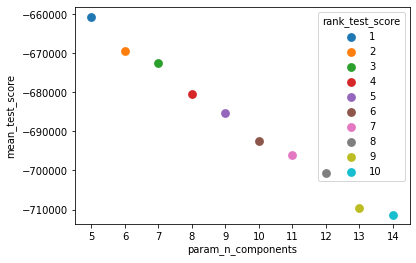

In [53]:
sns.pointplot(x="param_n_components", y="mean_test_score", hue="rank_test_score", data=df_cv_results)

- From the above plot, it can be said that choosing 5 components which is required as per the topics we have is the best for getting good score or for getting good classification of topics from the news articles.

In [54]:
document_term_matrix.shape

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10633, 5000)

In [59]:
best_lda_model

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5)

In [61]:
# Create a document to topic matrix
lda_output = best_lda_model.transform(document_term_matrix)
lda_output

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.02015792, 0.020394  , 0.02183916, 0.0201803 , 0.91742861],
       [0.00696834, 0.00691522, 0.30687618, 0.00693559, 0.67230467],
       [0.0034195 , 0.00342035, 0.48493051, 0.00344477, 0.50478487],
       ...,
       [0.01448946, 0.33017047, 0.34194035, 0.01465801, 0.29874171],
       [0.01688945, 0.26150476, 0.68722702, 0.0170965 , 0.01728226],
       [0.18909216, 0.029468  , 0.23555895, 0.51665071, 0.02923018]])

In [62]:
# Create a document to topic matrix
lda_output = best_lda_model.transform(document_term_matrix)
# column names
topicnames = ['Topic_' + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ['Doc_' + str(i) for i in range(len(text_from_data))]

# create a dataframe
df_document_topic = pd.DataFrame(np.round(lda_output,5), columns=topicnames, index=docnames)

df_document_topic.head()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
Doc_0,0.02016,0.02039,0.02184,0.02018,0.91743
Doc_1,0.00697,0.00692,0.30688,0.00694,0.67230
Doc_2,0.00342,0.00342,0.48493,0.00344,0.50478
Doc_3,0.19705,0.00342,0.00337,0.00340,0.79276
Doc_4,0.00415,0.07828,0.22028,0.00413,0.69315


In [63]:
# dominant topic
df_document_topic['Dominant_topic'] = np.argmax(df_document_topic.values, axis=1)
df_document_topic.head()

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Dominant_topic
Doc_0,0.02016,0.02039,0.02184,0.02018,0.91743,4
Doc_1,0.00697,0.00692,0.30688,0.00694,0.67230,4
Doc_2,0.00342,0.00342,0.48493,0.00344,0.50478,4
Doc_3,0.19705,0.00342,0.00337,0.00340,0.79276,4
Doc_4,0.00415,0.07828,0.22028,0.00413,0.69315,4


- The dominant topic from the data is Topic 1 whereas there are more words with probability score high for topic 5 for the first five documents

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\peddi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dominant_topic', ylabel='count'>

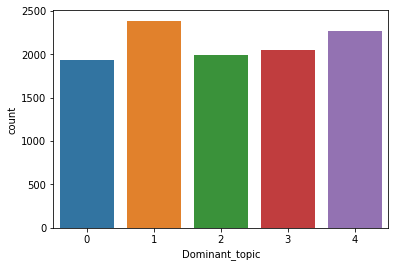

In [65]:
sns.countplot(df_document_topic.Dominant_topic)

In [67]:
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# assign column and index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames


# check the head
df_topic_keywords.iloc[:,:10]

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,000,000m,05,10,100,100m,102,10bn,10th,11
Topic_0,96.503111,40.196065,8.195742,152.627296,14.245572,16.585517,0.200861,0.200168,15.182636,81.497951
Topic_1,118.351509,0.200074,0.201760,48.577730,30.356577,0.201674,0.200780,0.211084,0.206004,29.685495
Topic_2,157.382465,0.200001,0.202567,92.484185,79.497524,0.202276,2.198859,0.200683,0.200637,19.639357
Topic_3,9.556669,0.203801,0.201979,85.263689,14.544168,21.718290,0.204281,0.200037,0.216825,29.917714
Topic_4,419.206246,0.200059,8.197951,179.047100,73.356159,13.292242,13.195219,20.188028,1.193898,79.259484


### Get top 20 words from each topic

In [69]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
topic_keywords = show_topics(count_vectorizer, best_lda_model, 20)

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
topic_keywords

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[array(['film', 'best', 'year', 'said', 'music', 'new', 'won', 'world',
        'british', 'awards', 'years', 'award', 'number', 'star',
        'director', 'uk', 'time', 'band', 'films', 'actor'], dtype='<U18'),
 array(['said', 'mr', 'government', 'labour', 'people', 'party',
        'election', 'blair', 'told', 'minister', 'new', 'public', 'brown',
        'say', 'bbc', 'prime', 'howard', 'plans', 'law', 'general'],
       dtype='<U18'),
 array(['said', 'people', 'technology', 'mobile', 'new', 'use', 'music',
        'users', 'digital', 'mr', 'software', 'games', 'phone', 'net',
        'like', 'online', 'computer', 'make', 'used', 'service'],
       dtype='<U18'),
 array(['said', 'game', 'england', 'time', 'win', 'year', 'play', 'just',
        'players', 'team', 'club', 'good', 'world', 'half', 'ireland',
        'match', 'wales', 'cup', 'final', 'second'], dtype='<U18'),
 array(['said', 'year', 'market', 'company', 'growth', '000', 'new',
        'economy', '2004', 'government', '

In [72]:
df_topic_keywords.shape

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, 5000)

In [73]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,film,best,year,said,music,new,won,world,british,awards,years,award,number,star,director,uk,time,band,films,actor
Topic 1,said,mr,government,labour,people,party,election,blair,told,minister,new,public,brown,say,bbc,prime,howard,plans,law,general
Topic 2,said,people,technology,mobile,new,use,music,users,digital,mr,software,games,phone,net,like,online,computer,make,used,service
Topic 3,said,game,england,time,win,year,play,just,players,team,club,good,world,half,ireland,match,wales,cup,final,second
Topic 4,said,year,market,company,growth,000,new,economy,2004,government,sales,bank,economic,world,firm,years,mr,uk,china,oil


In [74]:
df_topic_keywords.shape

C:\Users\peddi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, 20)

## 🥳🙂🕊